# LEAD SCORING CASE STUDY

### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

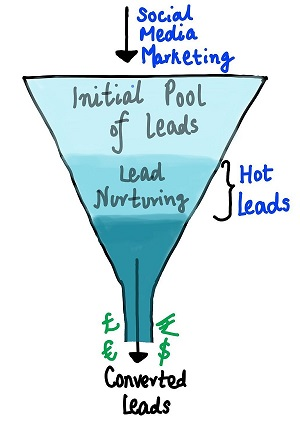
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study
There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)
pd.set_option('display.max_colwidth', -1) 

### Importing the Dataset

In [2]:
lead=pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Importing the Data Dictionary

In [3]:
lead1=pd.read_excel("Leads Data Dictionary.xlsx")
lead1.head

<bound method NDFrame.head of     Unnamed: 0                                        Unnamed: 1  \
0  NaN          NaN                                                
1  NaN          Variables                                          
2  NaN          Prospect ID                                        
3  NaN          Lead Number                                        
4  NaN          Lead Origin                                        
5  NaN          Lead Source                                        
6  NaN          Do Not Email                                       
7  NaN          Do Not Call                                        
8  NaN          Converted                                          
9  NaN          TotalVisits                                        
10 NaN          Total Time Spent on Website                        
11 NaN          Page Views Per Visit                               
12 NaN          Last Activity                                      
13 NaN          Co

In [4]:
#Copying the  data frame to a new data frame
lead2=lead

### Data Inspection

In [5]:
#checking total rows and cols in dataset
lead.shape

(9240, 37)

In [6]:
#Determing the information and datatyes of the data set
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
#Determing the basic statistical parameters of the data set
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Preprocessing

In [8]:
# As we can observe that there are select values for many column.
# This may be because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL and Converting 'Select' values to NaN.
lead = lead.replace('Select', np.nan)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
#Checking for the missing values in the data set
lead.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                      137 
Page Views Per Visit                             137 
Last Activity                                    103 
Lead Source                                      36  
Lead Origin                                      0   
Lead Number                 

In [10]:
#checking percentage of null values in data set
round(100*(lead.isnull().sum()/len(lead.index)),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                      1.48 
Page Views Per Visit                             1.48 
Last Activity                                    1.11 
Lead Source                                      0.39 
Lead Origin                                      0.00 
Lead Numbe

In [11]:
# dropping of columns where the missing pecentage is more than 45%
cols =lead.columns[round(100*(lead.isnull().sum()/len(lead.index)),2)>45]
lead.drop(cols, axis=1,inplace=True)

In [12]:
#Checking remaining missing percentage values in the data set post droping the variable
round(100*(lead.isnull().sum()/len(lead.index)),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                      1.48 
Page Views Per Visit                             1.48 
Last Activity                                    1.11 
Lead Source                                      0.39 
Lead Number                                      0.00 
Lead Origin                                      0.00 
Do Not Email                                     0.00 
Do Not Call                                      0.00 
Converted                                        0.00 
Total Time Spent on Website                      0.00 
Last Notable Activity                            0.00 
A free copy of Mastering The Interview           0.00 
Search    

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64


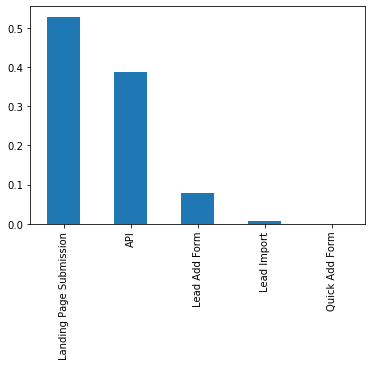

In [13]:
#Analyzing the column city of the data set
print(lead['Lead Origin'].value_counts(normalize=True))
lead['Lead Origin'].value_counts(normalize=True).plot(kind='bar')
plt.show()

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Live Chat            0.000217
Social Media         0.000217
Press_Release        0.000217
blog                 0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
NC_EDM               0.000109
youtubechannel       0.000109
testone              0.000109
Name: Lead Source, dtype: float64


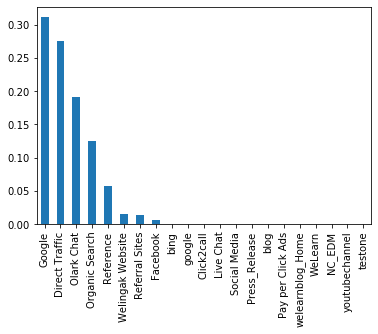

In [14]:
#Analyzing the column Lead Source of the data set
print(lead['Lead Source'].value_counts(normalize=True))
lead['Lead Source'].value_counts(normalize=True).plot(kind='bar')
plt.show()

#### It is observed that Lead Source has considerable number of categories with significantly low percentage so Combining them

In [15]:
#Combining low frequency values 
lead['Lead Source'] = lead['Lead Source'].replace(['google','Google'])
lead['Lead Source'] = lead['Lead Source'].replace(['Facebook','bing','Click2call','Social Media','Press_Release',
                                                     'youtubechannel','welearnblog_Home','Live Chat',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Other_Lead_Source') 
print(lead['Lead Source'].value_counts())

Direct Traffic       3670
Olark Chat           2547
Organic Search       1680
Reference            737 
Referral Sites       226 
Welingak Website     221 
Other_Lead_Source    95  
Name: Lead Source, dtype: int64


No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64


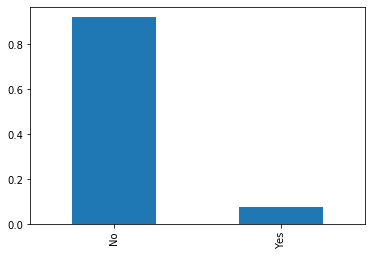

In [16]:
#Analyzing the column Do Not Email of the data set
print(lead['Do Not Email'].value_counts(normalize = True))
lead['Do Not Email'].value_counts(normalize = True).plot(kind='bar')
plt.show()

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64


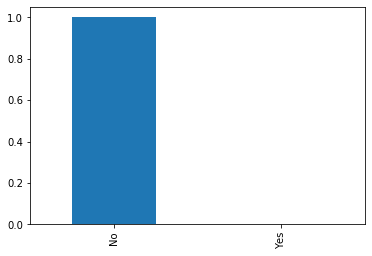

In [17]:
#Analyzing the column Do Not Call of the data set
print(lead['Do Not Call'].value_counts(normalize = True))
lead['Do Not Call'].value_counts(normalize = True).plot(kind='bar')
plt.show()

In [18]:
#dropping the variable as it highly skewed
lead.drop('Do Not Call',axis=1,inplace=True)

In [19]:
lead['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Resubscribed to emails          0.000109
Visited Booth in Tradeshow      0.000109
Name: Last Activity, dtype: float64

In [20]:
#combining low frequency values
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [21]:
#Replacing Nan Values with Others
lead['Last Activity'] = lead['Last Activity'].replace(np.nan,'Others')

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
France                  0.000885
Oman                    0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Germany                 0.000590
Sweden                  0.000443
Belgium                 0.000295
Ghana                   0.000295
Philippines             0.000295
Netherlands             0.000295
China                   0.000295
Bangladesh              0.000295
Italy                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Russia                  0.000148
Sri Lanka               0.000148
Indonesia 

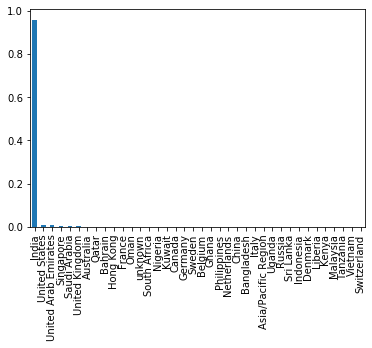

In [22]:
#Analyzing the column Country of the data set
print(lead['Country'].value_counts(normalize = True))
lead['Country'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [23]:
lead.drop('Country',axis=1,inplace=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Media and Advertising                0.034642
Travel and Tourism                   0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64


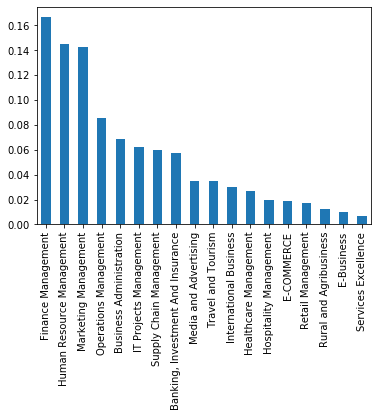

In [24]:
#Analyzing the column Specilization of the data set
print(lead['Specialization'].value_counts(normalize=True))
lead['Specialization'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [25]:
#combining low frequency values
lead['Specialization'] = lead['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 

In [26]:
#Replacing Nan Values with Mode Management Specializations
lead['Specialization'] = lead['Specialization'].replace(np.nan,'Management_Specializations')

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64


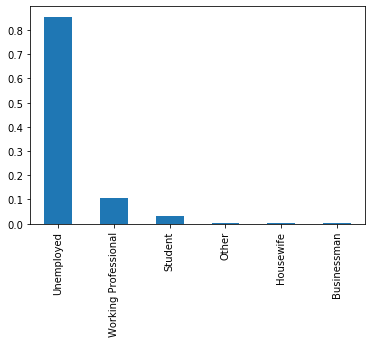

In [27]:
#Analyzing the column What is your current occupation of the data set
print(lead['What is your current occupation'].value_counts(normalize=True))
lead['What is your current occupation'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [28]:
#Replacing Nan Values with Mode Unemployed
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan,'Unemployed') 

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64


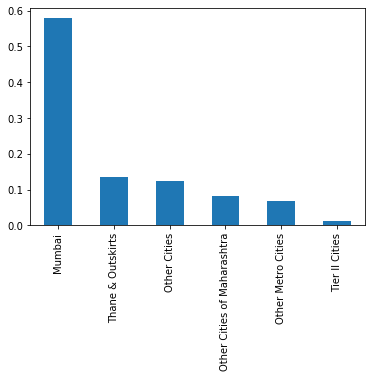

In [29]:
#Analyzing the column city of the data set
print(lead['City'].value_counts(normalize=True))
lead['City'].value_counts(normalize=True).plot(kind='bar')
plt.show()

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64


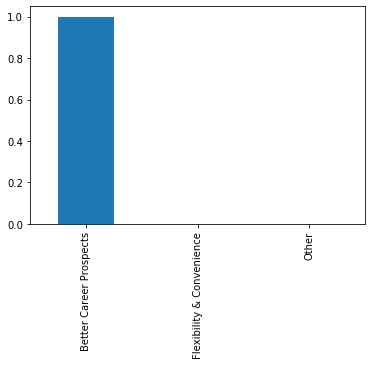

In [30]:
#Analyzing the column What matters most to you in choosing a course of the data set
print(lead['What matters most to you in choosing a course'].value_counts(normalize=True))
lead['What matters most to you in choosing a course'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [31]:
#droping the variable as it is highly skewed
lead.drop('What matters most to you in choosing a course',axis=1, inplace=True)

In [32]:
#Analyzing the column Search of the data set
lead['Search'].value_counts(normalize=True)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [33]:
#Droping of the variable as the varible is highly skewed
lead.drop('Search',axis=1,inplace=True)

In [34]:
#Analyzing the column Magazine of the data set
lead['Magazine'].value_counts(normalize=True)

No    1.0
Name: Magazine, dtype: float64

In [35]:
#Droping of the variable as the varible is highly skewed
lead.drop('Magazine',axis=1,inplace=True)

In [36]:
#Analyzing the column Newspaper Article of the data set
lead['Newspaper Article'].value_counts(normalize=True)


No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [37]:
#Droping of the variable as the varible is highly skewed
lead.drop('Newspaper Article',axis=1,inplace=True)

In [38]:
#Analyzing the column X Education Forums of the data set
lead['X Education Forums'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

In [39]:
#Droping of the variable as the varible is highly skewed
lead.drop('X Education Forums',axis=1,inplace=True)

In [40]:
#Analyzing the column Newspaper of the data set
lead['Newspaper'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

In [41]:
#Droping of the variable as the varible is highly skewed
lead.drop('Newspaper',axis=1,inplace=True)

In [42]:
#Analyzing the column Digital Advertisement of the data set
lead['Digital Advertisement'].value_counts(normalize=True)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [43]:
#Droping of the variable as the varible is highly skewed
lead.drop('Digital Advertisement',axis=1,inplace=True)

In [44]:
#Analyzing the column Through Recommendations of the data set
lead['Through Recommendations'].value_counts(normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [45]:
#Droping of the variable as the varible is highly skewed
lead.drop('Through Recommendations',axis=1,inplace=True)

In [46]:
#Analyzing the column Receive More Updates About Our Courses of the data set
lead['Receive More Updates About Our Courses'].value_counts(normalize=True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [47]:
#Droping of the variable as the varible is highly skewed
lead.drop('Receive More Updates About Our Courses',axis=1,inplace=True)

In [48]:
#dropping the Tag Variable as it is a Score Variable
lead.drop('Tags',axis=1, inplace=True)

In [49]:
#Analyzing the column Update me on Supply Chain Content of the data set
lead['Update me on Supply Chain Content'].value_counts(normalize=True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [50]:
#Droping of the variable as the varible is highly skewed
lead.drop('Update me on Supply Chain Content',axis=1,inplace=True)

In [51]:
#Analyzing the column Get updates on DM Content of the data set
lead['Get updates on DM Content'].value_counts(normalize=True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [52]:
#Droping of the variable as the varible is highly skewed
lead.drop('Get updates on DM Content',axis=1,inplace=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64


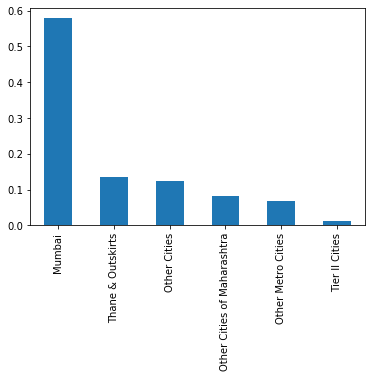

In [53]:
#Analyzing the column City of the data set
print(lead['City'].value_counts(normalize = True))
lead['City'].value_counts(normalize = True).plot(kind='bar')
#Replacing Nan Values with Mode Mumbai
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')

In [54]:
#Replacing Nan Values with Mode Mumbai
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')

In [55]:
#Analyzing the column I agree to pay the amount through cheque of the data set
lead['I agree to pay the amount through cheque'].value_counts(normalize=True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

In [56]:
#Droping of the variable as the varible is highly skewed
lead.drop('I agree to pay the amount through cheque',axis=1,inplace=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Form Submitted on Website       0.000108
Resubscribed to emails          0.000108
Email Received                  0.000108
View in browser link Clicked    0.000108
Approached upfront              0.000108
Name: Last Notable Activity, dtype: float64


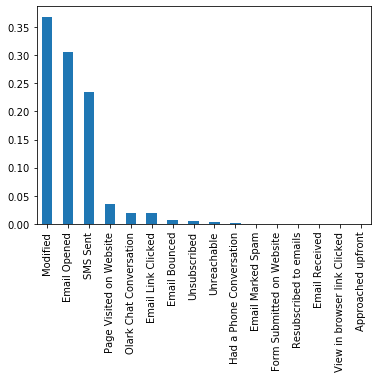

In [57]:
#Analyzing the column Last Notable Activity of the data set
print(lead['Last Notable Activity'].value_counts(normalize=True))
lead['Last Notable Activity'].value_counts(normalize = True).plot(kind='bar')
plt.show()

In [58]:
#Combining low frequency values 
lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable',
                                                                   'Unsubscribed','Email Bounced','Resubscribed to emails',
                                                    'View in browser link Clicked','Approached upfront', 
                                                        'Form Submitted on Website','Email Received'],'Other_Notable_Activity')

In [59]:
#Getting the information of the columns which are left
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
Prospect ID                               9240 non-null object
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9176 non-null object
Do Not Email                              9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9240 non-null object
Specialization                            9240 non-null object
What is your current occupation           9240 non-null object
City                                      9240 non-null object
A free copy of Mastering The Interview    9240 non-null object
Last Notable

In [60]:
#Checking for the missing values
lead.isnull().sum()

Prospect ID                               0  
Lead Number                               0  
Lead Origin                               0  
Lead Source                               64 
Do Not Email                              0  
Converted                                 0  
TotalVisits                               137
Total Time Spent on Website               0  
Page Views Per Visit                      137
Last Activity                             0  
Specialization                            0  
What is your current occupation           0  
City                                      0  
A free copy of Mastering The Interview    0  
Last Notable Activity                     0  
dtype: int64

In [61]:
#Checking remaining missing values in the data set post droping/imputing the variable
lead_missing= pd.DataFrame(lead.isnull().sum()).reset_index()
lead_missing

,index,0
0,Prospect ID,0
1,Lead Number,0
2,Lead Origin,0
3,Lead Source,64
4,Do Not Email,0
5,Converted,0
6,TotalVisits,137
7,Total Time Spent on Website,0
8,Page Views Per Visit,137
9,Last Activity,0


In [62]:
#Checking for the unique values in column 
lead['Prospect ID'].nunique()

9240

In [63]:
#Checking for the unique values in column 
lead['Lead Number'].nunique()

9240

In [64]:
#Droping of the variable as they are unique and will not help in analysis
lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

### EXPLORATORY DATA ANALYSIS

### Numerical Variables

In [65]:
#determining thec correlation of Numerical variable in the data set
lead.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.030395,0.362483,-0.003328
TotalVisits,0.030395,1.000000,0.221240,0.512125
Total Time Spent on Website,0.362483,0.221240,1.000000,0.320361
Page Views Per Visit,-0.003328,0.512125,0.320361,1.000000


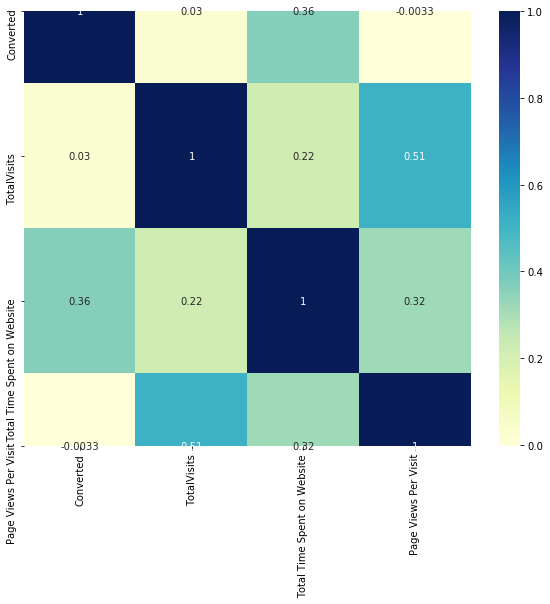

In [66]:
#Plotting of heatmap of correlation of the Numerical Variables
plt.figure(figsize=(10,8))
sns.heatmap(lead.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [67]:
#Analyzing the dependent variable
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

38.53896103896104

### Outier Treatment of Numerical Variables

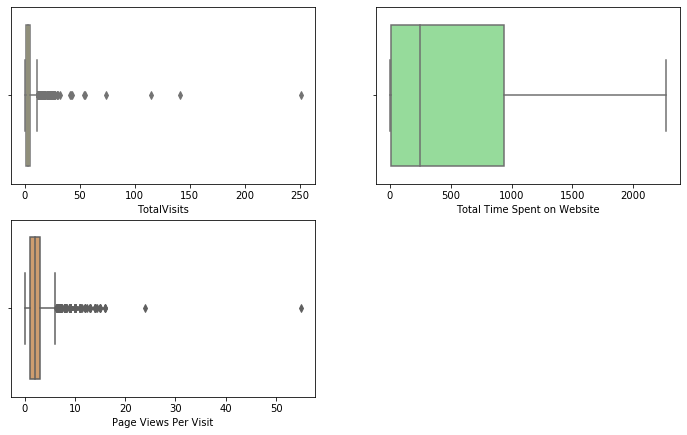

In [68]:
plt.figure(figsize = [12,15])
plt.subplot(4,2,1)
sns.boxplot(data = lead, x = "TotalVisits",color="#f5f189")
plt.subplot(4,2,2)
sns.boxplot(data = lead, x = "Total Time Spent on Website",color="#8ae691")
plt.subplot(4,2,3)
sns.boxplot(data = lead, x = "Page Views Per Visit",color="#de9d5f")

In [69]:
#determining the percentiles of column Total Visits
lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean     3.445238   
std      4.854853   
min      0.000000   
5%       0.000000   
25%      1.000000   
50%      3.000000   
75%      5.000000   
90%      7.000000   
95%      10.000000  
99%      17.000000  
max      251.000000 
Name: TotalVisits, dtype: float64

In [70]:
#capping of outliers
Q3 = lead.TotalVisits.quantile(0.95)
lead = lead[(lead.TotalVisits <= Q3)]


In [71]:
#determining the percentiles of column Total Time Spent on Website
lead['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8750.000000
mean     471.579771 
std      542.047642 
min      0.000000   
5%       0.000000   
25%      0.000000   
50%      234.000000 
75%      895.750000 
90%      1364.200000
95%      1549.000000
99%      1826.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [72]:
#capping of outliers
Q3 = lead['Total Time Spent on Website'].quantile(0.95)
lead = lead[(lead['Total Time Spent on Website'] <= Q3)]

In [73]:
#determining the percentiles of column Page Views Per Visit
lead['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8313.000000
mean     2.204568   
std      1.929561   
min      0.000000   
5%       0.000000   
25%      0.000000   
50%      2.000000   
75%      3.000000   
90%      5.000000   
95%      6.000000   
99%      8.000000   
max      10.000000  
Name: Page Views Per Visit, dtype: float64

In [74]:
#capping of outliers
Q3 = lead['Page Views Per Visit'].quantile(0.95)
lead = lead[(lead['Page Views Per Visit'] <= Q3)]

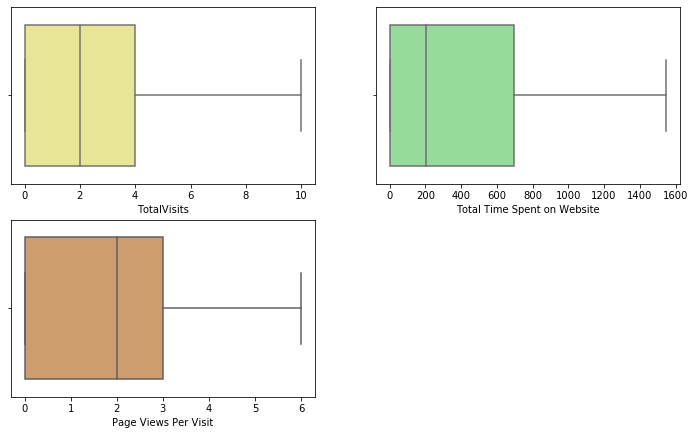

In [75]:
plt.figure(figsize = [12,15])
plt.subplot(4,2,1)
sns.boxplot(data = lead, x = "TotalVisits",color="#f5f189")
plt.subplot(4,2,2)
sns.boxplot(data = lead, x = "Total Time Spent on Website",color="#8ae691")
plt.subplot(4,2,3)
sns.boxplot(data = lead, x = "Page Views Per Visit",color="#de9d5f")
plt.show()

In [76]:
#Checking remaining missing percentage values in the data set post droping/imputing/outlier treatment of the variables
round(100*(lead.isnull().sum()/len(lead.index)),2)

Lead Origin                               0.00
Lead Source                               0.68
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      0.00
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [77]:
# Dropping null value Rows
lead.dropna(inplace = True)

In [78]:
#Checking remaining missing percentage values in the data set post droping/imputing/outlier treatment of the variables
round(100*(lead.isnull().sum()/len(lead.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [79]:
#Balance Rows left for the Analysis in percentage
print(lead.shape)
left_rows=100*(len(lead)/len(lead2))
left_rows

(7998, 13)


86.55844155844156

In [80]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

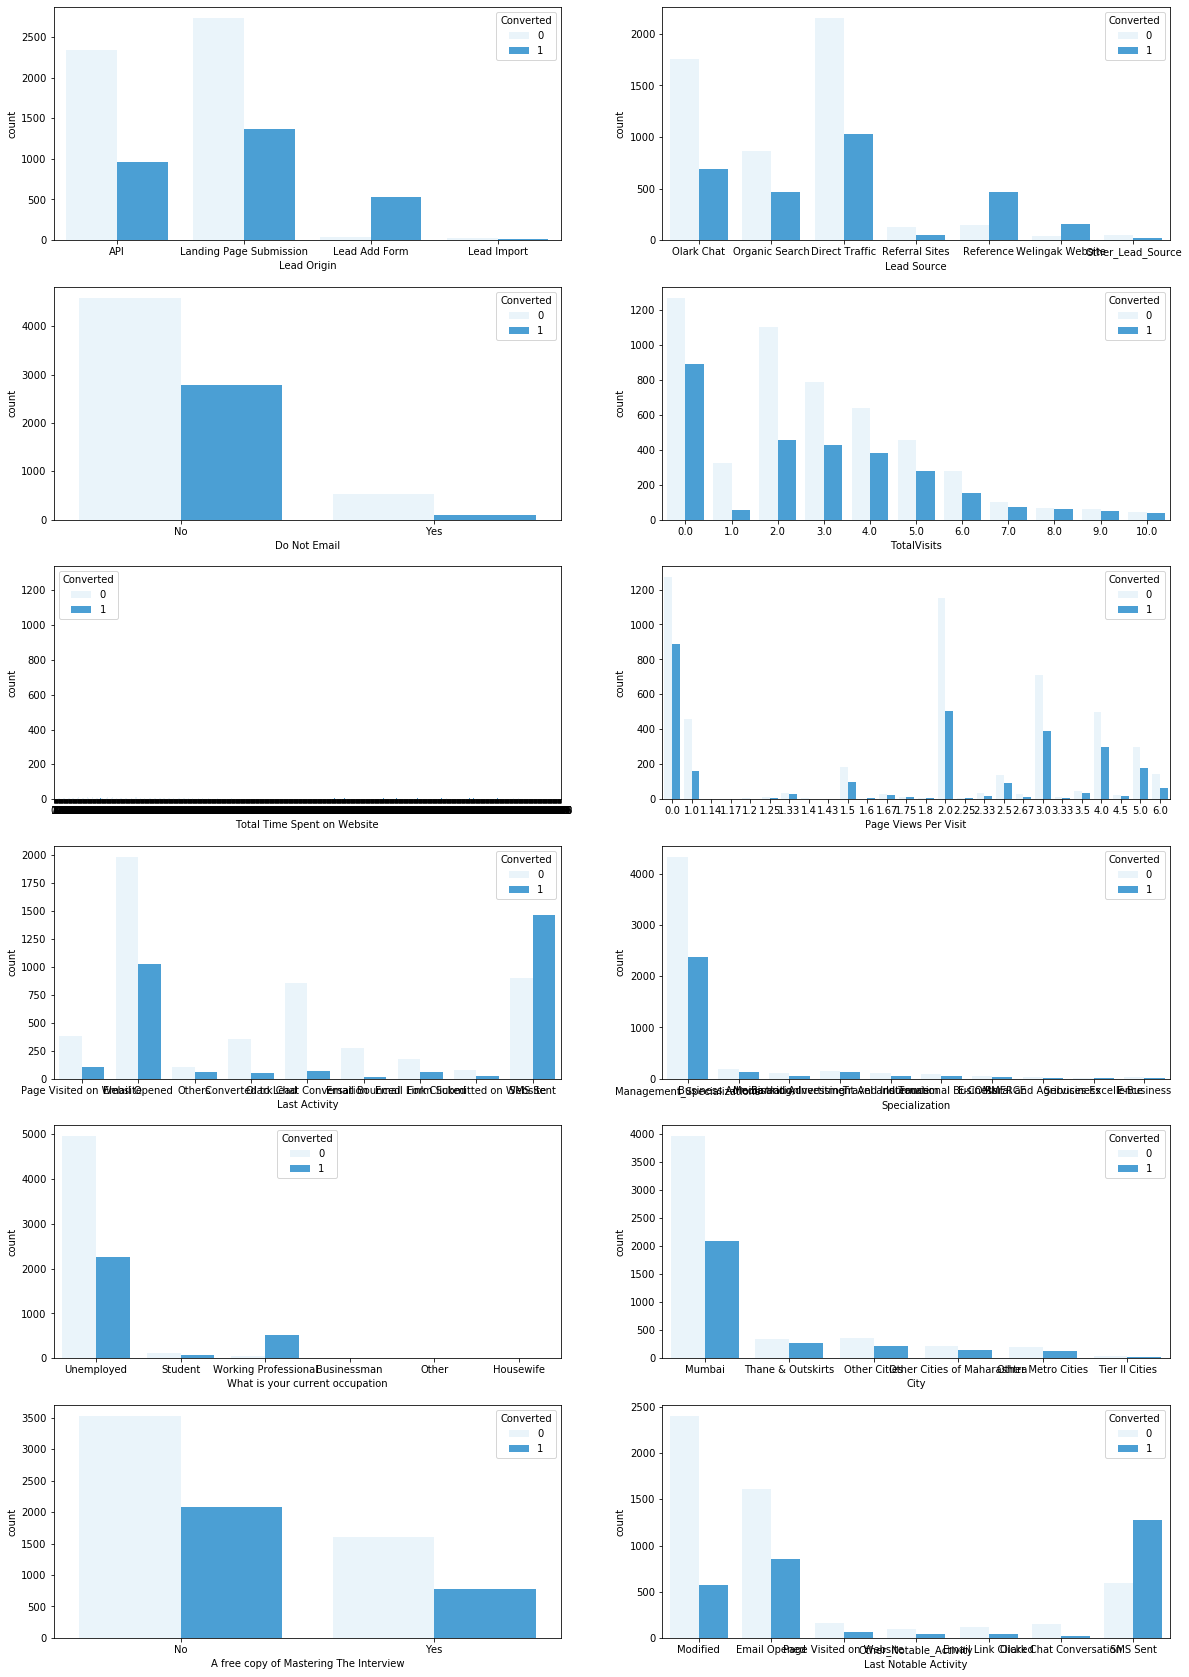

In [81]:
features = ['Lead Origin','Lead Source','Do Not Email','TotalVisits','Total Time Spent on Website', 'Page Views Per Visit','Last Activity',
            'Specialization','What is your current occupation','City','A free copy of Mastering The Interview','Last Notable Activity']
plt.figure(figsize = (20,30))
for i in enumerate(features):
    plt.subplot(6,2,i[0]+1)
    sns.countplot(x=i[1],hue='Converted',data=lead,color="#34a4eb")

In [82]:
#Determining the categorical columns of the left over dataset
cat_cols= lead.select_dtypes(include=['object']).columns
cat_cols



Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [83]:
#Determining the numerical columns of the left over dataset
num_cols= lead.select_dtypes(exclude=['object']).columns
num_cols

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [84]:
#Checking for the binary categorical variables
lead['Do Not Email'].value_counts(normalize=True)

No     0.92173
Yes    0.07827
Name: Do Not Email, dtype: float64

In [85]:
#Checking for the binary categorical variables
lead['A free copy of Mastering The Interview'].value_counts(normalize=True)

No     0.702926
Yes    0.297074
Name: A free copy of Mastering The Interview, dtype: float64

In [86]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']
lead[varlist]=lead[varlist].apply(lambda x:x.map({'Yes': 1,'No': 0}))
lead[varlist].head()

,A free copy of Mastering The Interview,Do Not Email
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [87]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'
# ignoring the binary variables
var=['Lead Origin', 'Lead Source','Last Activity','Specialization', 'What is your current occupation',
     'City', 'Last Notable Activity']
dummies = pd.get_dummies(lead[var], drop_first=True)
print(dummies.shape)
dummies.head()
lead.drop(var,axis=1,inplace=True)

(7998, 42)


In [88]:
# Add the results to the original dataframe
lead = pd.concat([lead, dummies], axis = 1)

In [89]:
lead.shape

(7998, 48)

In [90]:
lead.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other_Lead_Source',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Me

### Step : Test-Train Split

### Dividing into X and Y sets for the model building

In [91]:
#taking the dependent variable on y axis and the independent variable on the x axis
y = lead['Converted']
y.head()
X=lead.drop('Converted', axis=1)

In [92]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print(X_train.shape)
X_test.shape

(5598, 47)


(2400, 47)

### Step: Feature Scaling

In [93]:
scaler = StandardScaler()

In [94]:
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5515,-0.293866,-0.302643,-0.564919,-0.023327,-0.654821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4634,-0.293866,0.123892,2.324509,0.577883,1.527136,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4392,-0.293866,-1.155713,-0.862360,-1.225746,-0.654821,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3279,-0.293866,-0.302643,-0.613784,-0.023327,-0.654821,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1296,-0.293866,-0.729178,1.423687,-0.624536,-0.654821,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


### Step : Looking at Correlations

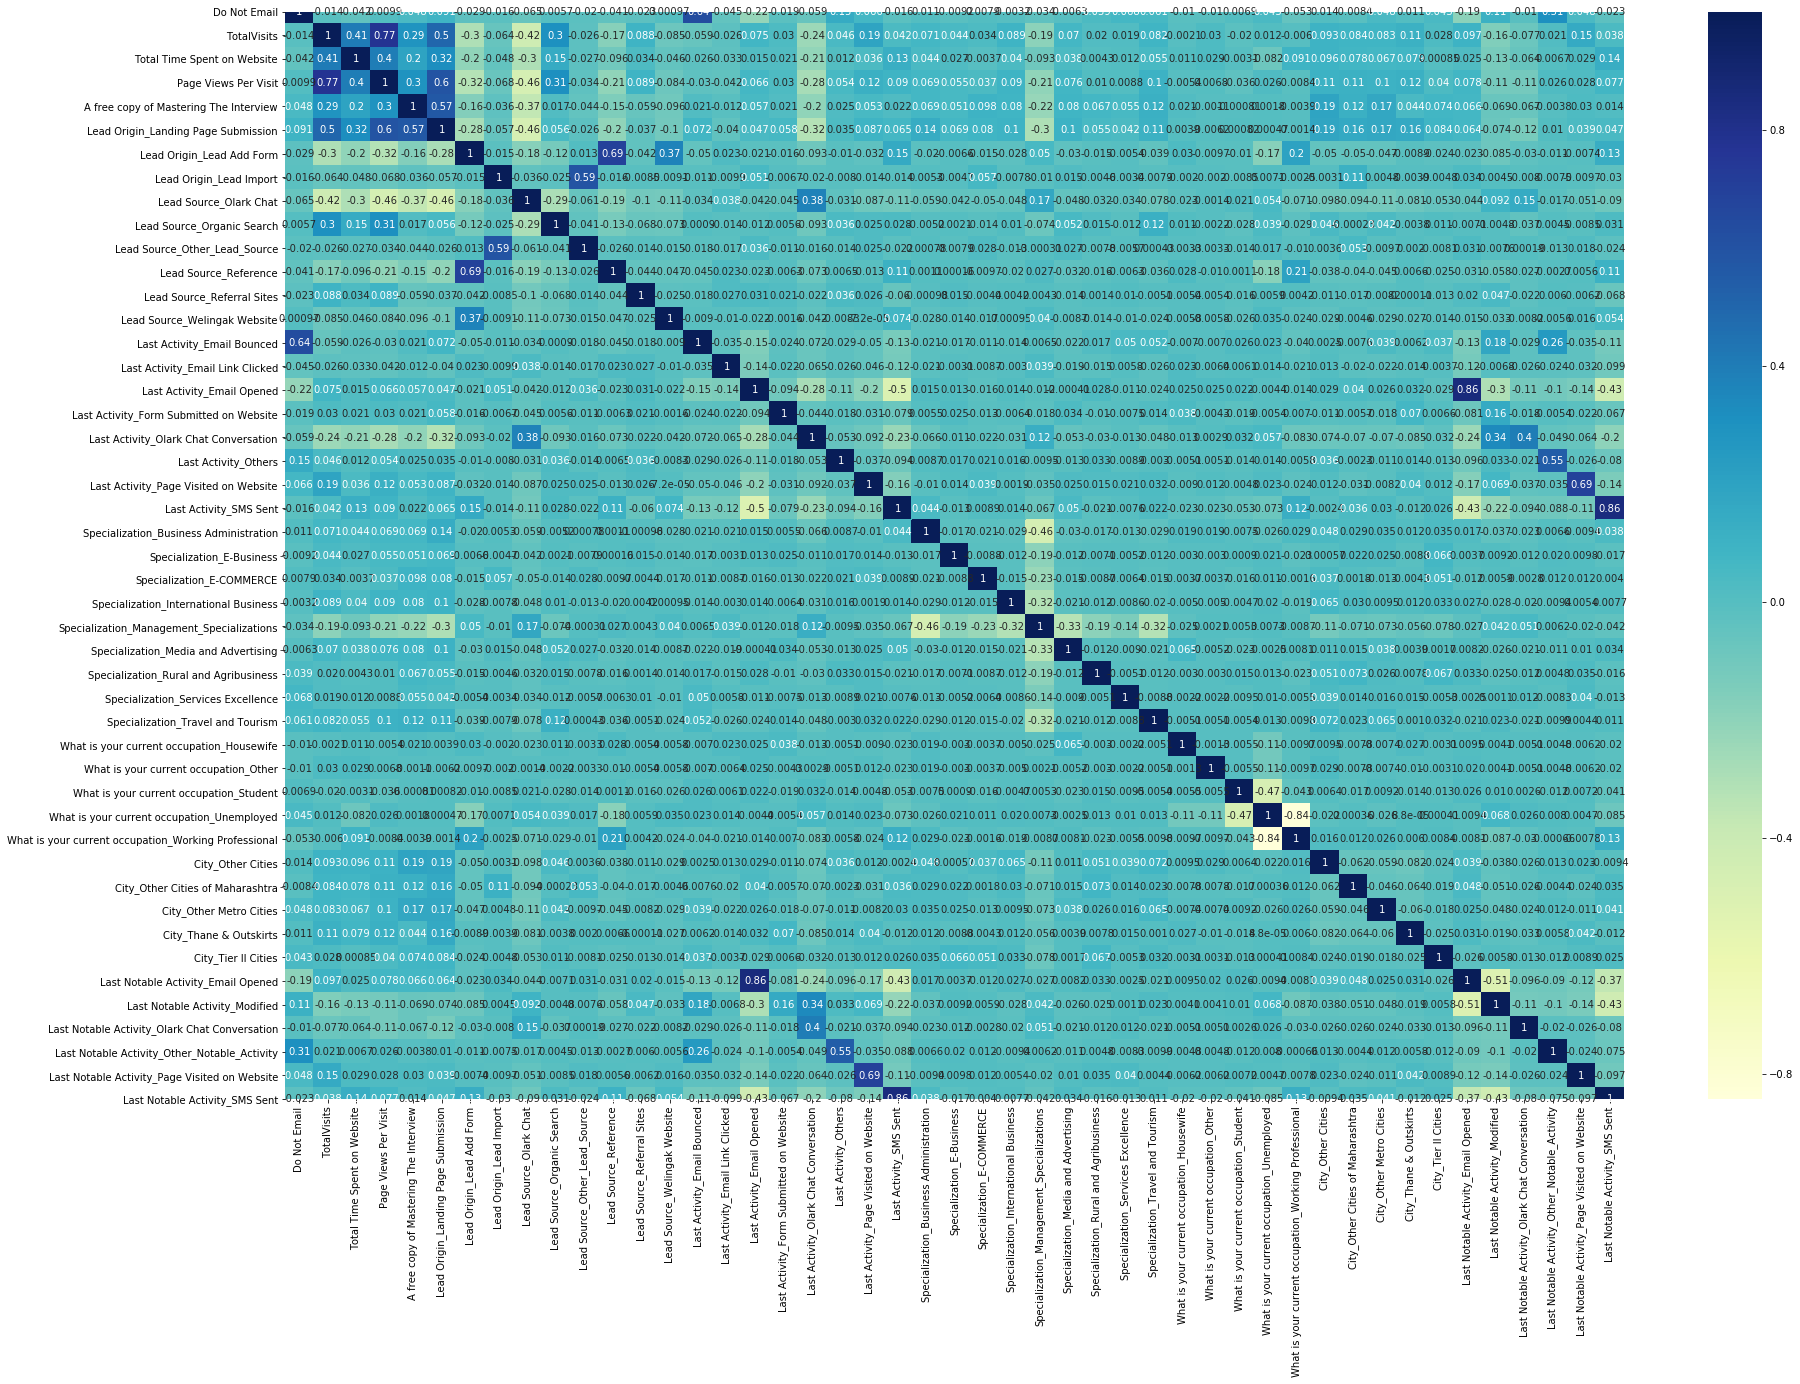

In [95]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 20))
sns.heatmap(X_train.corr(), cmap="YlGnBu",annot=True)
plt.show()

- Last Notable Activity_Email Opened & Last Activity_Email Opened
- Last Activity_SMS Sent & Last Notable Activity_SMS Sent
- What is your current occupation_Unemployed & What is your current occupation_Working Professional

In [96]:
X_train.drop(columns=['What is your current occupation_Unemployed','Last Notable Activity_SMS Sent'
                      ,'Last Notable Activity_Email Opened'],axis=1,inplace=True)
X_test.drop(columns=['What is your current occupation_Unemployed','Last Notable Activity_SMS Sent'
                      ,'Last Notable Activity_Email Opened'],axis=1,inplace=True)
y_test.drop(columns=['What is your current occupation_Unemployed','Last Notable Activity_SMS Sent'
                      ,'Last Notable Activity_Email Opened'],axis=1,inplace=True)
y_train.drop(columns=['What is your current occupation_Unemployed','Last Notable Activity_SMS Sent'
                      ,'Last Notable Activity_Email Opened'],axis=1,inplace=True)

In [97]:
#observing the data type of the train data set
X_train.dtypes

Do Not Email                                            float64
TotalVisits                                             float64
Total Time Spent on Website                             float64
Page Views Per Visit                                    float64
A free copy of Mastering The Interview                  float64
Lead Origin_Landing Page Submission                     uint8  
Lead Origin_Lead Add Form                               uint8  
Lead Origin_Lead Import                                 uint8  
Lead Source_Olark Chat                                  uint8  
Lead Source_Organic Search                              uint8  
Lead Source_Other_Lead_Source                           uint8  
Lead Source_Reference                                   uint8  
Lead Source_Referral Sites                              uint8  
Lead Source_Welingak Website                            uint8  
Last Activity_Email Bounced                             uint8  
Last Activity_Email Link Clicked        

## Building our model
#### This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

### RFE
#### Recursive feature elimination

In [98]:
logreg = LogisticRegression()
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [99]:
rfe.support_

array([ True, False,  True, False, False,  True,  True, False,  True,
       False, False, False, False,  True, False, False,  True, False,
        True,  True, False,  True, False,  True, False, False, False,
        True, False, False, False,  True,  True, False,  True, False,
        True, False,  True, False,  True,  True,  True, False])

In [100]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('A free copy of Mastering The Interview', False, 16),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Other_Lead_Source', False, 24),
 ('Lead Source_Reference', False, 23),
 ('Lead Source_Referral Sites', False, 10),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 18),
 ('Last Activity_Email Link Clicked', False, 19),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 4),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 13),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', 

In [101]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_E-Business', 'Specialization_Media and Advertising',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'City_Other Cities of Maharashtra', 'City_Thane & Outskirts',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other_Notable_Activity'],
      dtype='object')

In [102]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Organic Search', 'Lead Source_Other_Lead_Source',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Student', 'City_Other Cities',
       'City_Other Metro Cities', 'City_Tier II Cities',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [103]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

### Building model using statsmodel, for the detailed statistics

In [104]:
#BUILDING MODEL #1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5598
Model:                            GLM   Df Residuals:                     5577
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2299.9
Date:                Mon, 07 Sep 2020   Deviance:                       4599.9
Time:                        19:52:26   Pearson chi2:                 5.44e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4602      0.136    -10.718      0.000      -1.727      -1.193
Do Not Email                                            -0.4040      0.056     -7.224      0.000      -0.514      -0.294
Total Time Spent on Website                              0.9483      0.040     23.498      0.000       0.869       1.027
Lead Origin_Landing Page Submission                     -0.5411      0.092     -5.891      0.000      -0.721      -0.361
Lead Origin_Lead Add Form                                3.7026      0.237     15.634      0.000       3.238       4.167
Lead Source_Olark Chat                                   0.6471      0.099      6.559      0.000       0.454       0.840
Lead Source_Welingak Website                             0.4510      0.290      1.556      0.120      -0.117       1.019
Last Activity_Email Opened                               0.3409      0.125      2.725      0.006       0.096       0.586
Last Activity_Olark Chat Conversation                   -0.7049      0.223     -3.158      0.002      -1.142      -0.267
Last Activity_Others                                     0.9422      0.325      2.897      0.004       0.305       1.580
Last Activity_SMS Sent                                   1.6487      0.126     13.109      0.000       1.402       1.895
Specialization_E-Business                                0.5819      0.420      1.385      0.166      -0.241       1.405
Specialization_Media and Advertising                    -0.3656      0.248     -1.471      0.141      -0.853       0.121
What is your current occupation_Housewife               23.5263   1.57e+04      0.002      0.999   -3.07e+04    3.07e+04
What is your current occupation_Other                    1.2395      0.882      1.405      0.160      -0.489       2.968
What is your current occupation_Working Professional     2.9507      0.213     13.842      0.000       2.533       3.368
City_Other Cities of Maharashtra                         0.3650      0.168      2.170      0.030       0.035       0.695
City_Thane & Outskirts                                   0.2970      0.136      2.184      0.029       0.030       0.563
Last Notable Activity_Modified                          -0.7941      0.097     -8.167      0.000      -0.985      -0.603
Last Notable Activity_Olark Chat Conversation           -0.8611      0.442     -1.948      0.051      -1.727       0.005
Last Notable Activity_Other_Notable_Activity             0.5241      0.390      1.342      0.180      -0.241       1.289
========================================================================================================================
"""

In [105]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)

In [106]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5598
Model:                            GLM   Df Residuals:                     5578
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2308.0
Date:                Mon, 07 Sep 2020   Deviance:                       4615.9
Time:                        19:52:26   Pearson chi2:                 5.45e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4566      0.136    -10.723      0.000      -1.723      -1.190
Do Not Email                                            -0.4051      0.056     -7.249      0.000      -0.515      -0.296
Total Time Spent on Website                              0.9471      0.040     23.521      0.000       0.868       1.026
Lead Origin_Landing Page Submission                     -0.5390      0.092     -5.882      0.000      -0.719      -0.359
Lead Origin_Lead Add Form                                3.7148      0.236     15.712      0.000       3.251       4.178
Lead Source_Olark Chat                                   0.6410      0.099      6.508      0.000       0.448       0.834
Lead Source_Welingak Website                             0.4390      0.290      1.515      0.130      -0.129       1.007
Last Activity_Email Opened                               0.3433      0.125      2.754      0.006       0.099       0.588
Last Activity_Olark Chat Conversation                   -0.7121      0.223     -3.194      0.001      -1.149      -0.275
Last Activity_Others                                     0.9314      0.325      2.867      0.004       0.295       1.568
Last Activity_SMS Sent                                   1.6404      0.125     13.083      0.000       1.395       1.886
Specialization_E-Business                                0.5756      0.420      1.371      0.170      -0.247       1.398
Specialization_Media and Advertising                    -0.2976      0.244     -1.220      0.222      -0.776       0.180
What is your current occupation_Other                    1.2333      0.882      1.399      0.162      -0.495       2.962
What is your current occupation_Working Professional     2.9404      0.213     13.803      0.000       2.523       3.358
City_Other Cities of Maharashtra                         0.3599      0.168      2.142      0.032       0.031       0.689
City_Thane & Outskirts                                   0.3180      0.135      2.348      0.019       0.053       0.583
Last Notable Activity_Modified                          -0.7866      0.097     -8.117      0.000      -0.976      -0.597
Last Notable Activity_Olark Chat Conversation           -0.8536      0.442     -1.932      0.053      -1.719       0.012
Last Notable Activity_Other_Notable_Activity             0.5301      0.390      1.359      0.174      -0.234       1.294
========================================================================================================================
"""

In [107]:
#dropping column with high p-value
col = col.drop('Specialization_Media and Advertising',1)

In [108]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.62
6,Last Activity_Email Opened,2.04
7,Last Activity_Olark Chat Conversation,2.04
4,Lead Source_Olark Chat,2.03
9,Last Activity_SMS Sent,1.90
15,Last Notable Activity_Modified,1.89
17,Last Notable Activity_Other_Notable_Activity,1.62
3,Lead Origin_Lead Add Form,1.62
8,Last Activity_Others,1.50
16,Last Notable Activity_Olark Chat Conversation,1.32


In [109]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5598
Model:                            GLM   Df Residuals:                     5579
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2308.7
Date:                Mon, 07 Sep 2020   Deviance:                       4617.4
Time:                        19:52:27   Pearson chi2:                 5.46e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4574      0.136    -10.731      0.000      -1.724      -1.191
Do Not Email                                            -0.4050      0.056     -7.244      0.000      -0.515      -0.295
Total Time Spent on Website                              0.9471      0.040     23.529      0.000       0.868       1.026
Lead Origin_Landing Page Submission                     -0.5488      0.091     -6.012      0.000      -0.728      -0.370
Lead Origin_Lead Add Form                                3.7144      0.237     15.705      0.000       3.251       4.178
Lead Source_Olark Chat                                   0.6409      0.098      6.509      0.000       0.448       0.834
Lead Source_Welingak Website                             0.4361      0.290      1.502      0.133      -0.133       1.005
Last Activity_Email Opened                               0.3434      0.125      2.755      0.006       0.099       0.588
Last Activity_Olark Chat Conversation                   -0.7104      0.223     -3.186      0.001      -1.147      -0.273
Last Activity_Others                                     0.9348      0.325      2.879      0.004       0.298       1.571
Last Activity_SMS Sent                                   1.6363      0.125     13.058      0.000       1.391       1.882
Specialization_E-Business                                0.5862      0.420      1.397      0.162      -0.236       1.409
What is your current occupation_Other                    1.2384      0.882      1.404      0.160      -0.490       2.967
What is your current occupation_Working Professional     2.9371      0.213     13.786      0.000       2.520       3.355
City_Other Cities of Maharashtra                         0.3616      0.168      2.153      0.031       0.032       0.691
City_Thane & Outskirts                                   0.3207      0.135      2.370      0.018       0.055       0.586
Last Notable Activity_Modified                          -0.7867      0.097     -8.122      0.000      -0.977      -0.597
Last Notable Activity_Olark Chat Conversation           -0.8536      0.442     -1.932      0.053      -1.719       0.012
Last Notable Activity_Other_Notable_Activity             0.5325      0.390      1.366      0.172      -0.232       1.297
========================================================================================================================
"""

In [110]:
#dropping column with high p-value
col = col.drop('Last Notable Activity_Other_Notable_Activity',1)

In [111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.61
6,Last Activity_Email Opened,2.04
7,Last Activity_Olark Chat Conversation,2.04
4,Lead Source_Olark Chat,2.01
9,Last Activity_SMS Sent,1.89
15,Last Notable Activity_Modified,1.83
3,Lead Origin_Lead Add Form,1.62
16,Last Notable Activity_Olark Chat Conversation,1.32
1,Total Time Spent on Website,1.27
5,Lead Source_Welingak Website,1.21


In [112]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5598
Model:                            GLM   Df Residuals:                     5580
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2309.6
Date:                Mon, 07 Sep 2020   Deviance:                       4619.3
Time:                        19:52:27   Pearson chi2:                 5.46e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4242      0.133    -10.670      0.000      -1.686      -1.163
Do Not Email                                            -0.3801      0.052     -7.284      0.000      -0.482      -0.278
Total Time Spent on Website                              0.9474      0.040     23.539      0.000       0.869       1.026
Lead Origin_Landing Page Submission                     -0.5513      0.091     -6.041      0.000      -0.730      -0.372
Lead Origin_Lead Add Form                                3.7143      0.237     15.696      0.000       3.250       4.178
Lead Source_Olark Chat                                   0.6428      0.098      6.528      0.000       0.450       0.836
Lead Source_Welingak Website                             0.4361      0.290      1.505      0.132      -0.132       1.004
Last Activity_Email Opened                               0.3216      0.124      2.603      0.009       0.079       0.564
Last Activity_Olark Chat Conversation                   -0.7110      0.223     -3.190      0.001      -1.148      -0.274
Last Activity_Others                                     1.1859      0.262      4.530      0.000       0.673       1.699
Last Activity_SMS Sent                                   1.6114      0.124     13.014      0.000       1.369       1.854
Specialization_E-Business                                0.5981      0.419      1.426      0.154      -0.224       1.420
What is your current occupation_Other                    1.2399      0.882      1.406      0.160      -0.488       2.968
What is your current occupation_Working Professional     2.9446      0.214     13.789      0.000       2.526       3.363
City_Other Cities of Maharashtra                         0.3651      0.168      2.177      0.030       0.036       0.694
City_Thane & Outskirts                                   0.3208      0.135      2.371      0.018       0.056       0.586
Last Notable Activity_Modified                          -0.8143      0.095     -8.590      0.000      -1.000      -0.628
Last Notable Activity_Olark Chat Conversation           -0.8812      0.441     -1.997      0.046      -1.746      -0.016
========================================================================================================================
"""

In [113]:
#dropping column with high p-value
col = col.drop('Specialization_E-Business',1)

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.59
6,Last Activity_Email Opened,2.04
7,Last Activity_Olark Chat Conversation,2.03
4,Lead Source_Olark Chat,2.01
9,Last Activity_SMS Sent,1.89
14,Last Notable Activity_Modified,1.83
3,Lead Origin_Lead Add Form,1.62
15,Last Notable Activity_Olark Chat Conversation,1.32
1,Total Time Spent on Website,1.27
5,Lead Source_Welingak Website,1.21


In [115]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5598
Model:                            GLM   Df Residuals:                     5581
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2310.6
Date:                Mon, 07 Sep 2020   Deviance:                       4621.2
Time:                        19:52:27   Pearson chi2:                 5.47e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4240      0.133    -10.671      0.000      -1.686      -1.162
Do Not Email                                            -0.3794      0.052     -7.277      0.000      -0.482      -0.277
Total Time Spent on Website                              0.9479      0.040     23.557      0.000       0.869       1.027
Lead Origin_Landing Page Submission                     -0.5432      0.091     -5.967      0.000      -0.722      -0.365
Lead Origin_Lead Add Form                                3.7210      0.237     15.729      0.000       3.257       4.185
Lead Source_Olark Chat                                   0.6421      0.098      6.523      0.000       0.449       0.835
Lead Source_Welingak Website                             0.4300      0.290      1.485      0.138      -0.138       0.998
Last Activity_Email Opened                               0.3233      0.123      2.619      0.009       0.081       0.565
Last Activity_Olark Chat Conversation                   -0.7099      0.223     -3.185      0.001      -1.147      -0.273
Last Activity_Others                                     1.1915      0.261      4.559      0.000       0.679       1.704
Last Activity_SMS Sent                                   1.6097      0.124     13.005      0.000       1.367       1.852
What is your current occupation_Other                    1.2340      0.882      1.400      0.162      -0.494       2.962
What is your current occupation_Working Professional     2.9385      0.213     13.765      0.000       2.520       3.357
City_Other Cities of Maharashtra                         0.3656      0.168      2.179      0.029       0.037       0.694
City_Thane & Outskirts                                   0.3142      0.135      2.324      0.020       0.049       0.579
Last Notable Activity_Modified                          -0.8128      0.095     -8.574      0.000      -0.999      -0.627
Last Notable Activity_Olark Chat Conversation           -0.8818      0.441     -1.998      0.046      -1.747      -0.017
========================================================================================================================
"""

In [116]:
#dropping column with high p-value
col = col.drop('What is your current occupation_Other',1)

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.59
6,Last Activity_Email Opened,2.04
7,Last Activity_Olark Chat Conversation,2.03
4,Lead Source_Olark Chat,2.01
9,Last Activity_SMS Sent,1.89
13,Last Notable Activity_Modified,1.83
3,Lead Origin_Lead Add Form,1.62
14,Last Notable Activity_Olark Chat Conversation,1.32
1,Total Time Spent on Website,1.27
5,Lead Source_Welingak Website,1.21


In [118]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5598
Model:                            GLM   Df Residuals:                     5582
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2311.6
Date:                Mon, 07 Sep 2020   Deviance:                       4623.2
Time:                        19:52:27   Pearson chi2:                 5.48e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4223      0.133    -10.659      0.000      -1.684      -1.161
Do Not Email                                            -0.3795      0.052     -7.279      0.000      -0.482      -0.277
Total Time Spent on Website                              0.9492      0.040     23.600      0.000       0.870       1.028
Lead Origin_Landing Page Submission                     -0.5448      0.091     -5.985      0.000      -0.723      -0.366
Lead Origin_Lead Add Form                                3.7192      0.237     15.723      0.000       3.256       4.183
Lead Source_Olark Chat                                   0.6409      0.098      6.513      0.000       0.448       0.834
Lead Source_Welingak Website                             0.4282      0.290      1.479      0.139      -0.139       0.996
Last Activity_Email Opened                               0.3265      0.123      2.646      0.008       0.085       0.568
Last Activity_Olark Chat Conversation                   -0.7020      0.223     -3.154      0.002      -1.138      -0.266
Last Activity_Others                                     1.1908      0.261      4.556      0.000       0.679       1.703
Last Activity_SMS Sent                                   1.6093      0.124     13.001      0.000       1.367       1.852
What is your current occupation_Working Professional     2.9363      0.213     13.756      0.000       2.518       3.355
City_Other Cities of Maharashtra                         0.3633      0.168      2.165      0.030       0.034       0.692
City_Thane & Outskirts                                   0.3118      0.135      2.307      0.021       0.047       0.577
Last Notable Activity_Modified                          -0.8118      0.095     -8.568      0.000      -0.997      -0.626
Last Notable Activity_Olark Chat Conversation           -0.8904      0.441     -2.018      0.044      -1.755      -0.026
========================================================================================================================
"""

In [119]:
#dropping column with high p-value
col = col.drop('Lead Source_Welingak Website',1)

In [120]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.59
5,Last Activity_Email Opened,2.03
6,Last Activity_Olark Chat Conversation,2.03
4,Lead Source_Olark Chat,2.01
8,Last Activity_SMS Sent,1.89
12,Last Notable Activity_Modified,1.83
3,Lead Origin_Lead Add Form,1.42
13,Last Notable Activity_Olark Chat Conversation,1.32
1,Total Time Spent on Website,1.26
9,What is your current occupation_Working Professional,1.15


In [121]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5598
Model:                            GLM   Df Residuals:                     5583
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2312.7
Date:                Mon, 07 Sep 2020   Deviance:                       4625.4
Time:                        19:52:28   Pearson chi2:                 5.50e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4122      0.133    -10.600      0.000      -1.673      -1.151
Do Not Email                                            -0.3777      0.052     -7.265      0.000      -0.480      -0.276
Total Time Spent on Website                              0.9506      0.040     23.642      0.000       0.872       1.029
Lead Origin_Landing Page Submission                     -0.5486      0.091     -6.031      0.000      -0.727      -0.370
Lead Origin_Lead Add Form                                3.8284      0.227     16.839      0.000       3.383       4.274
Lead Source_Olark Chat                                   0.6332      0.098      6.444      0.000       0.441       0.826
Last Activity_Email Opened                               0.3248      0.123      2.632      0.008       0.083       0.567
Last Activity_Olark Chat Conversation                   -0.7039      0.223     -3.161      0.002      -1.140      -0.267
Last Activity_Others                                     1.1903      0.261      4.554      0.000       0.678       1.703
Last Activity_SMS Sent                                   1.6084      0.124     12.998      0.000       1.366       1.851
What is your current occupation_Working Professional     2.9411      0.214     13.764      0.000       2.522       3.360
City_Other Cities of Maharashtra                         0.3671      0.168      2.189      0.029       0.038       0.696
City_Thane & Outskirts                                   0.3069      0.135      2.269      0.023       0.042       0.572
Last Notable Activity_Modified                          -0.8111      0.095     -8.564      0.000      -0.997      -0.625
Last Notable Activity_Olark Chat Conversation           -0.8684      0.439     -1.978      0.048      -1.729      -0.008
========================================================================================================================
"""

In [122]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.59
5,Last Activity_Email Opened,2.03
6,Last Activity_Olark Chat Conversation,2.03
4,Lead Source_Olark Chat,2.01
8,Last Activity_SMS Sent,1.89
12,Last Notable Activity_Modified,1.83
3,Lead Origin_Lead Add Form,1.42
13,Last Notable Activity_Olark Chat Conversation,1.32
1,Total Time Spent on Website,1.26
9,What is your current occupation_Working Professional,1.15


In [123]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5515    0.442799
4634    0.676788
4392    0.238125
3279    0.063224
1296    0.733039
2982    0.920870
526     0.575123
6303    0.238125
8553    0.434842
6710    0.257467
dtype: float64

In [124]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.44279914, 0.67678767, 0.23812475, 0.06322428, 0.73303881,
       0.92087033, 0.57512252, 0.23812475, 0.43484189, 0.25746713])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [125]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.442799,5515
1,1,0.676788,4634
2,0,0.238125,4392
3,0,0.063224,3279
4,1,0.733039,1296


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [126]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.442799,5515,0
1,1,0.676788,4634,1
2,0,0.238125,4392,0
3,0,0.063224,3279,0
4,1,0.733039,1296,1


In [127]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3226  366]
 [ 648 1358]]


In [128]:
# Predicted     not_converted    converted
# Actual
# not_converted        3226      366
# converted            648       1358  

In [129]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8188638799571275


In [130]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6769690927218345

In [132]:
# Let us calculate specificity
TN / float(TN+FP)

0.8981069042316259

In [133]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
FP/ float(TN+FP)

0.10189309576837416

In [134]:
# positive predictive value 
TP / float(TP+FP)

0.7877030162412993

In [135]:
# Negative predictive value
TN / float(TN+ FN)

0.8327310273618999

### Step : Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [136]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [137]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

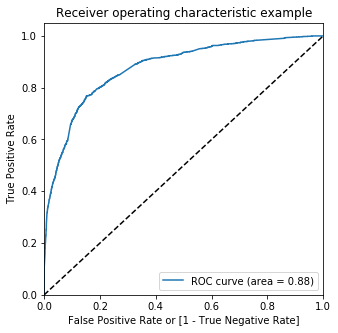

In [138]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.88 indicating a good predictive model.

### Step : Finding Optimal Cutoff Point

In [139]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.442799,5515,0,1,1,1,1,1,0,0,0,0,0
1,1,0.676788,4634,1,1,1,1,1,1,1,1,0,0,0
2,0,0.238125,4392,0,1,1,1,0,0,0,0,0,0,0
3,0,0.063224,3279,0,1,0,0,0,0,0,0,0,0,0
4,1,0.733039,1296,1,1,1,1,1,1,1,1,1,0,0


In [140]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0  0.0   0.358342  1.000000  0.000000
0.1  0.1   0.596284  0.963111  0.391425
0.2  0.2   0.730975  0.908774  0.631682
0.3  0.3   0.794034  0.811067  0.784521
0.4  0.4   0.817792  0.745264  0.858296
0.5  0.5   0.818864  0.676969  0.898107
0.6  0.6   0.797428  0.549352  0.935969
0.7  0.7   0.786174  0.484048  0.954900
0.8  0.8   0.769203  0.400798  0.974944
0.9  0.9   0.726688  0.249252  0.993318


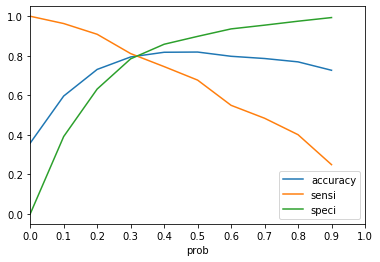

In [141]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
#plt.figure(figsize=(10,8))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()


In [142]:
#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.442799,5515,0,1,1,1,1,1,0,0,0,0,0,1
1,1,0.676788,4634,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.238125,4392,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.063224,3279,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.733039,1296,1,1,1,1,1,1,1,1,1,0,0,1


In [143]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_Prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.442799,5515,1,44
1,1,0.676788,4634,1,68
2,0,0.238125,4392,0,24
3,0,0.063224,3279,0,6
4,1,0.733039,1296,1,73


In [144]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8177920685959271

In [145]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3083,  509],
       [ 511, 1495]], dtype=int64)

In [146]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [147]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7452642073778664

In [148]:
# Let us calculate specificity
TN / float(TN+FP)

0.8582962138084632

In [149]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.14170378619153676


In [150]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7460079840319361


In [151]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8578185865331107


## Precision and Recall

In [152]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3083,  509],
       [ 511, 1495]], dtype=int64)

##### Precision
TP / TP + FP

In [153]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7460079840319361

##### Recall
TP / TP + FN

In [154]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7452642073778664

In [155]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7460079840319361

In [156]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7452642073778664

### Precision and recall tradeoff

In [157]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

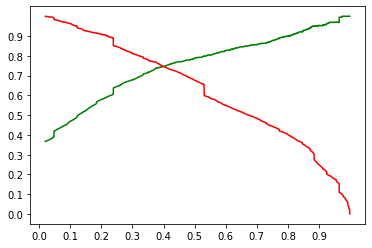

In [158]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))
plt.show()

### Step : Making predictions on the test set

In [159]:
#scaling test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activity,Last Notable Activity_Page Visited on Website
8692,-0.285602,0.144270,-0.188225,-0.303055,1.564697,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
523,-0.285602,-0.286922,2.211378,0.003203,1.564697,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5725,-0.285602,-0.286922,1.750654,0.003203,1.564697,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1511,-0.285602,0.575462,1.688798,0.003203,-0.639101,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69,-0.285602,-1.149306,-0.836651,-1.221829,-0.639101,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [160]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,What is your current occupation_Working Professional,City_Other Cities of Maharashtra,City_Thane & Outskirts,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
8692,-0.285602,-0.188225,1,0,0,0,0,0,1,0,0,0,0,0
523,-0.285602,2.211378,1,0,0,1,0,0,0,0,0,0,0,0
5725,-0.285602,1.750654,1,0,0,0,0,0,1,0,0,0,0,0
1511,-0.285602,1.688798,0,0,0,1,0,0,0,0,0,0,0,0
69,-0.285602,-0.836651,0,0,1,0,1,0,0,0,0,0,1,0


In [161]:
X_test_sm = sm.add_constant(X_test)

### PREDICTIONS ON TEST SET

In [162]:
y_test_pred = res.predict(X_test_sm)

In [163]:
y_test_pred[:10]

8692    0.395681
523     0.639673
5725    0.805272
1511    0.651543
69      0.048271
7367    0.052212
3109    0.030611
4008    0.918390
6985    0.242014
7287    0.464942
dtype: float64

In [164]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [165]:
# Let's see the head
y_pred_1.head()

,0
8692,0.395681
523,0.639673
5725,0.805272
1511,0.651543
69,0.048271


In [166]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [167]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [168]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [169]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [170]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8692,0.395681
1,0,523,0.639673
2,0,5725,0.805272
3,1,1511,0.651543
4,0,69,0.048271


In [171]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [172]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,8692,0.395681
1,0,523,0.639673
2,0,5725,0.805272
3,1,1511,0.651543
4,0,69,0.048271


In [173]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['lead_score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [174]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,lead_score
0,8692,0,0.395681,40
1,523,0,0.639673,64
2,5725,0,0.805272,81
3,1511,1,0.651543,65
4,69,0,0.048271,5


In [175]:
y_pred_final['final_Converted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

In [176]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,lead_score,final_Converted
0,8692,0,0.395681,40,0
1,523,0,0.639673,64,1
2,5725,0,0.805272,81,1
3,1511,1,0.651543,65,1
4,69,0,0.048271,5,0


In [177]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Converted)

0.8229166666666666

In [178]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Converted )
confusion2

array([[1319,  218],
       [ 207,  656]], dtype=int64)

In [179]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [180]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7601390498261877

In [181]:
# Let us calculate specificity
TN / float(TN+FP)

0.8581652569941445

In [182]:
precision_score(y_pred_final.Converted , y_pred_final.final_Converted)

0.7505720823798627

In [183]:
recall_score(y_pred_final.Converted, y_pred_final.final_Converted)

0.7601390498261877